In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine
from sqlalchemy import create_engine, text

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Create the engine to your database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect an existing database into a new model 
Base = automap_base()
Base.prepare(autoload_with=engine)

# Print all the classes (tables) that automap found
print(Base.classes.keys())

# Reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

['station', 'measurement']


In [7]:
# View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [8]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
Session = sessionmaker(bind=engine)

In [10]:
# Reflect the database using autoload_with parameter
Base = automap_base()
Base.prepare(autoload_with=engine)

# Print all the classes (tables) that automap found
print(Base.classes.keys())

# Save references to the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create a session factory
Session = sessionmaker(bind=engine)

# Instantiate a session
session = Session()

# Find the most recent date in the data set
most_recent_date = session.query(func.max(Measurement.date)).scalar()


['station', 'measurement']


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()

<Figure size 1000x600 with 0 Axes>

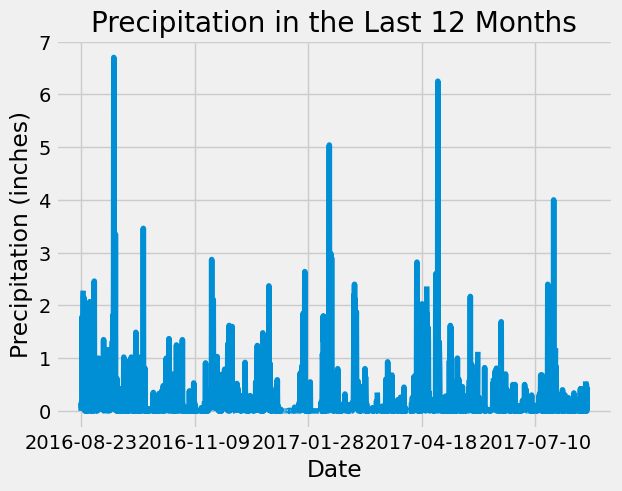

In [13]:
# Create the engine to your database (adjust the path to your specific database)
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Session = sessionmaker(bind=engine)
session = Session()

# Starting from the most recent data point in the database
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the date one year from the last date in the data set
last_12_months_date = most_recent_date - pd.DateOffset(months=12)

# Convert last_12_months_date to string format
last_12_months_date_str = last_12_months_date.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores 
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_12_months_date_str).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and explicitly set the column names 
precip_df = pd.DataFrame(precip_data, columns=['date', 'precipitation'])

# Set the date as the index
precip_df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
precip_df.plot(y='precipitation', use_index=True, legend=False)
plt.title('Precipitation in the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precip_df['precipitation'].describe()

# Display the summary statistics
print(summary_stats)


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station).label('count')).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

In [18]:
# The most active station ID from the previous query 
most_active_station_id = 'USC00519281'

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()

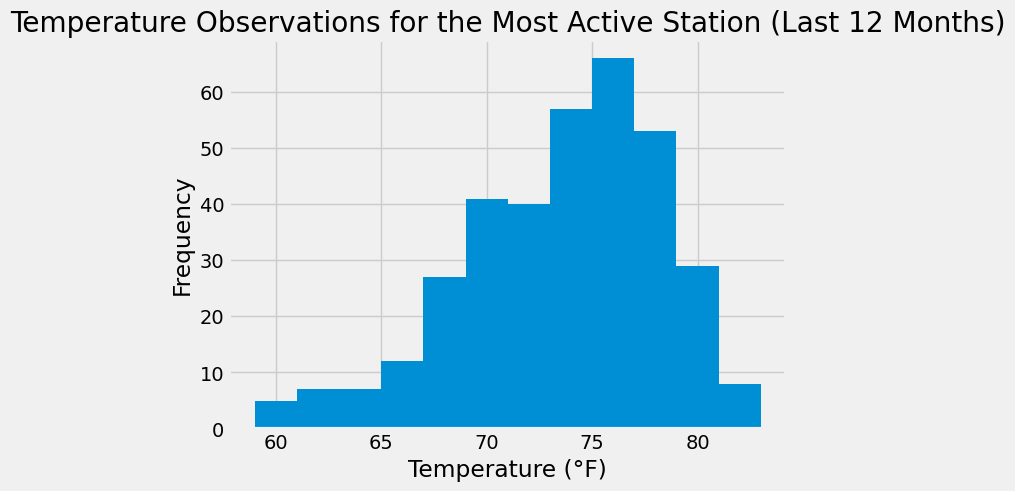

In [19]:
# Create an engine to connect to the database
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

# Query the most active station id
with engine.connect() as connection:
    result = connection.execute(text('''
        SELECT station
        FROM measurement
        GROUP BY station
        ORDER BY COUNT(station) DESC
        LIMIT 1
    '''))
    most_active_station = result.fetchone()[0]

# Query the last 12 months of temperature observation data for the most active station
temp_data = pd.read_sql_query(f'''
    SELECT date, tobs
    FROM measurement
    WHERE station = '{most_active_station}'
    AND date >= (SELECT DATE(MAX(date), '-1 year') FROM measurement)
''', engine)

# Plot the results as a histogram
plt.hist(temp_data['tobs'], bins=12)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observations for the Most Active Station (Last 12 Months)')
plt.show()

# Close Session

In [21]:
# Close Session
session.close()